## Make new geometry dataset

In [59]:
from pathlib import Path
import sys as sys
sys.path.append('/Users/mzahn/github_others/simplegrid')
import simplegrid as sg
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

Some code here uses pieces of Ian's code available from SASSIE github:
https://github.com/NASA-SASSIE/ECCO/blob/master/SASSIE_utils/sassie_N1_utils.py

Open mitgrid files and create dictionary for each geometry variable

In [306]:
N1_geometry_dir = Path('/Users/mzahn/data/grids/grid_sassie/N1_1080/tile_geometry')

## open mitgrid files for each face
t1 = N1_geometry_dir / 'tile001.mitgrid'
t2 = N1_geometry_dir / 'tile002.mitgrid'
t3 = N1_geometry_dir / 'tile003.mitgrid'
t4 = N1_geometry_dir / 'tile004.mitgrid'
t5 = N1_geometry_dir / 'tile005.mitgrid'

## create a dictionary for each face
N1_mg  = dict()
N1_mg[1] = sg.gridio.read_mitgridfile(t1, 1080, 680)
N1_mg[2] = sg.gridio.read_mitgridfile(t2, 1080, 680)
N1_mg[3] = sg.gridio.read_mitgridfile(t3, 1080, 1080)
N1_mg[4] = sg.gridio.read_mitgridfile(t4, 680, 1080)
N1_mg[5] = sg.gridio.read_mitgridfile(t5, 680, 1080)

## see all variables in grid file
print(N1_mg[1].keys())

## create dictionaries for each geometry variable
XC_N1_faces  = dict()
YC_N1_faces  = dict()
XG_N1_faces  = dict()
YG_N1_faces  = dict()
RAC_N1_faces = dict()
DXG_N1_faces = dict()
DYG_N1_faces = dict()
RAZ_N1_faces = dict()
DXC_N1_faces = dict()
DYC_N1_faces = dict()
RAW_N1_faces = dict()
RAS_N1_faces = dict()
DXF_N1_faces = dict()
DYF_N1_faces = dict()
DXV_N1_faces = dict()
DYU_N1_faces = dict()

# DX_N1_faces = dict() # is this a fair approximation with the assumption that each grid cell is a square?

## loop through each face and extract geometry variable
## transpose each array in order for it to reflect the ECCO map we are familiar with
for face in range(1,6):
    XC_N1_faces[face]  = N1_mg[face]['XC'].T
    YC_N1_faces[face]  = N1_mg[face]['YC'].T
    XG_N1_faces[face]  = N1_mg[face]['XG'].T
    YG_N1_faces[face]  = N1_mg[face]['YG'].T
    RAC_N1_faces[face] = N1_mg[face]['RAC'].T
    DXG_N1_faces[face] = N1_mg[face]['DXG'].T
    DYG_N1_faces[face] = N1_mg[face]['DYG'].T
    RAZ_N1_faces[face] = N1_mg[face]['RAZ'].T
    DXC_N1_faces[face] = N1_mg[face]['DXC'].T
    DYC_N1_faces[face] = N1_mg[face]['DYC'].T
    RAW_N1_faces[face] = N1_mg[face]['RAW'].T
    RAS_N1_faces[face] = N1_mg[face]['RAS'].T
    DXF_N1_faces[face] = N1_mg[face]['DXF'].T
    DYF_N1_faces[face] = N1_mg[face]['DYF'].T
    DXV_N1_faces[face] = N1_mg[face]['DXV'].T
    DYU_N1_faces[face] = N1_mg[face]['DYU'].T
    
    # DX_N1_faces[face] = np.sqrt(DX_N1_faces[face])

dict_keys(['XC', 'YC', 'DXF', 'DYF', 'RAC', 'XG', 'YG', 'DXV', 'DYU', 'RAZ', 'DXC', 'DYC', 'RAW', 'RAS', 'DXG', 'DYG'])


Quick sanity check to see how these files look

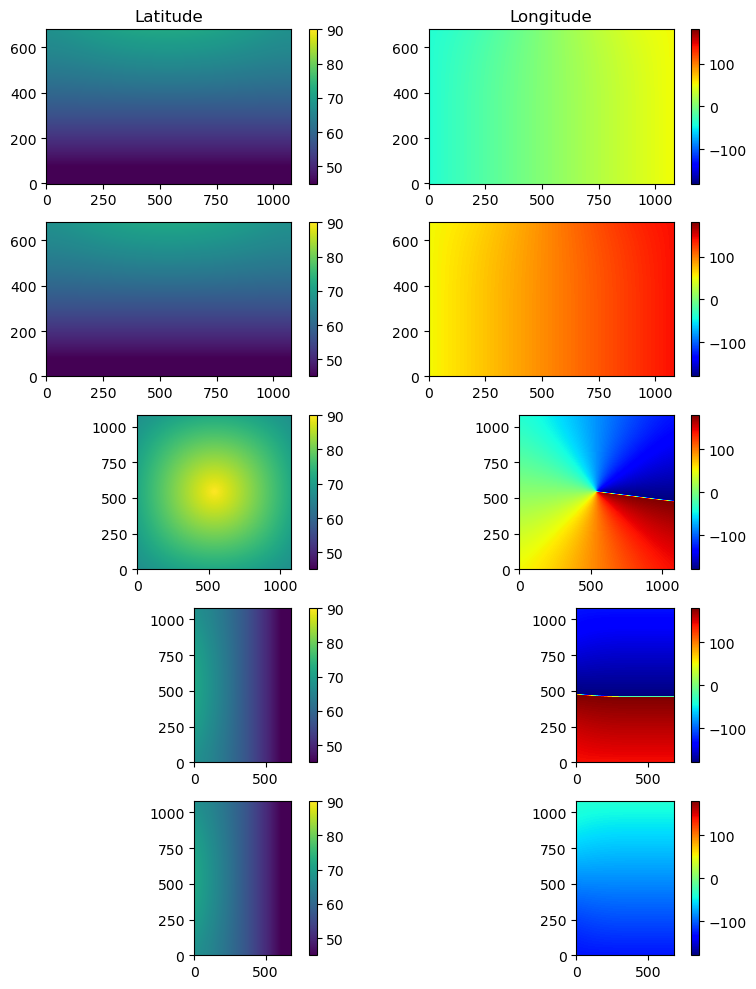

In [309]:
# plot output to inspect files
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2, figsize=[8,10])

lat = ax1.imshow(YC_N1_faces[1], origin='lower',vmin=45,vmax=90)
lon = ax2.imshow(XC_N1_faces[1], origin='lower',cmap='jet',vmin=-180,vmax=180)
fig.colorbar(lat, ax=ax1)
fig.colorbar(lon, ax=ax2)

lat = ax3.imshow(YC_N1_faces[2], origin='lower',vmin=45,vmax=90)
lon = ax4.imshow(XC_N1_faces[2], origin='lower',cmap='jet',vmin=-180,vmax=180)
fig.colorbar(lat, ax=ax3)
fig.colorbar(lon, ax=ax4)

lat = ax5.imshow(YC_N1_faces[3], origin='lower',vmin=45,vmax=90)
lon = ax6.imshow(XC_N1_faces[3], origin='lower',cmap='jet',vmin=-180,vmax=180)
fig.colorbar(lat, ax=ax5)
fig.colorbar(lon, ax=ax6)

lat = ax7.imshow(YC_N1_faces[4], origin='lower',vmin=45,vmax=90)
lon = ax8.imshow(XC_N1_faces[4], origin='lower',cmap='jet',vmin=-180,vmax=180)
fig.colorbar(lat, ax=ax7)
fig.colorbar(lon, ax=ax8)

lat = ax9.imshow(YC_N1_faces[5], origin='lower',vmin=45,vmax=90)
lon = ax10.imshow(XC_N1_faces[5], origin='lower',cmap='jet',vmin=-180,vmax=180)
fig.colorbar(lat, ax=ax9)
fig.colorbar(lon, ax=ax10)

ax1.set_title("Latitude")
ax2.set_title("Longitude")

plt.tight_layout()

Function to combine the 5 faces

In [339]:
def combine_sassie_N1_faces(face_arr, num_rotations=2):
    ## create grid of np.nan that we will fill with the individual tile values
    new_arr = np.zeros((680*2+1080, 680*2+1080))*np.nan
    
    # face 1 will be left, center
    start_row = 680
    end_row = start_row + 1080
    start_col = 0
    end_col = start_col + 680
    new_arr[start_row:end_row, start_col:end_col] = np.flipud(face_arr[1].T)

    ## face 2 will be center, bottom
    start_row = 0
    end_row = start_row + 680
    start_col = 680
    end_col = start_col + 1080
    new_arr[start_row:end_row, start_col:end_col] = face_arr[2]
    
    ## face 3 will be in the center (Arctic tile)
    start_row = 680
    end_row = start_row + 1080
    start_col = 680
    end_col = start_col + 1080
    new_arr[start_row:end_row, start_col:end_col] = face_arr[3]
    
    ## face 4 will be on the right, center
    start_row = 680
    end_row = start_row + 1080
    start_col = 680 + 1080
    end_col = start_col + 680
    new_arr[start_row:end_row, start_col:end_col] = face_arr[4]
    
    ## face 5 will be center, top
    start_row = 680 + 1080
    end_row = start_row + 680
    start_col = 680
    end_col = start_col + 1080
    new_arr[start_row:end_row, start_col:end_col] = np.fliplr(face_arr[5].T) # rotate 90 to the left

    return np.rot90(new_arr,num_rotations)

Function to plot the combined file to ensure it worked

In [341]:
def plot_sassie_N1_faces_combined(face_arr, num_rotations=2,\
    hs='X', facecolor='grey', vmin=-1,vmax=1, cmap='jet',\
    show_colorbar=True, axs = None):

    tmp = combine_sassie_N1_faces(face_arr, num_rotations=num_rotations)

    if axs == None:
        h = plt.imshow(tmp, origin='lower', interpolation='none',vmin=vmin,vmax=vmax, cmap=cmap)
        if show_colorbar:
            plt.colorbar()
        axs = plt.gca()
    else:
        h = axs.imshow(tmp, origin='lower', interpolation='none',vmin=vmin,vmax=vmax, cmap=cmap)
        fig = plt.gcf()
        if show_colorbar:
            fig.colorbar(h, ax=axs)

    axs.add_patch( Rectangle((0, 0), 681,681, hatch=hs, facecolor=facecolor))
    axs.add_patch( Rectangle((680+1080, 1080+680), 681,681,hatch=hs, facecolor=facecolor))
    axs.add_patch( Rectangle((0, 1080+680), 681,681, hatch=hs, facecolor=facecolor))
    axs.add_patch( Rectangle((1080+680,0), 681,681, hatch=hs, facecolor=facecolor))

    return axs, tmp, h

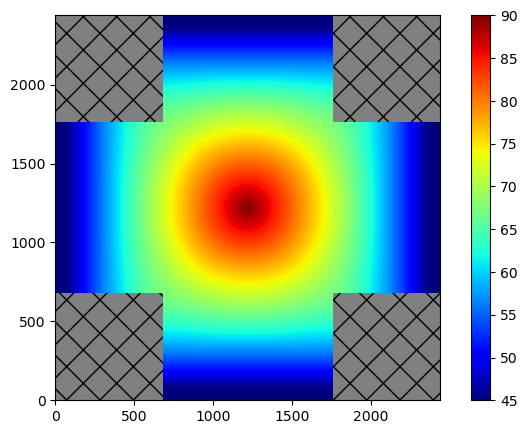

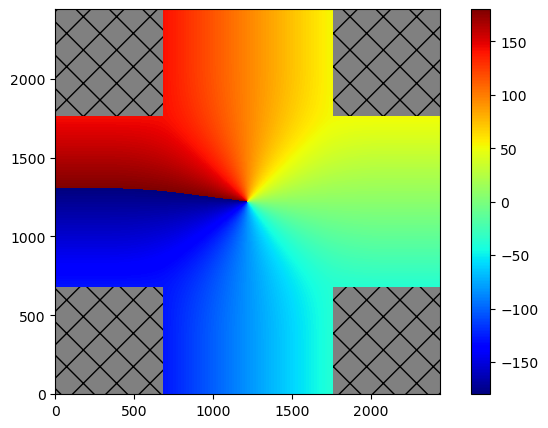

In [343]:
plt.figure(figsize=[8,5]);
tmpA = plot_sassie_N1_faces_combined(YC_N1_faces,vmin=45,vmax=90);
plt.figure(figsize=[8,5]);
tmpB = plot_sassie_N1_faces_combined(XC_N1_faces,vmin=-180,vmax=180);

Extract HHv2

In [ ]:
DYG_HH = su.combine_sassie_N1_faces_to_HH_u_point(DYG_N1_faces, DXG_N1_faces)

plt.figure(figsize=[8,4])
su.plot_sassie_N1_faces_HH(YC_N1_faces)

plt.figure(figsize=[8,4])
su.plot_sassie_N1_faces_HH(XC_N1_faces)

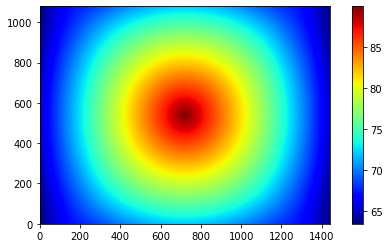

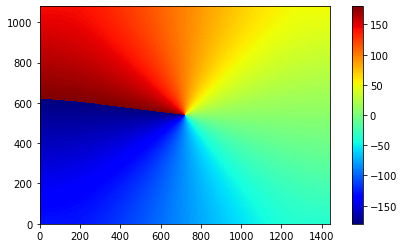

In [12]:
YC_HH = su.combine_sassie_N1_faces_to_HH(YC_N1_faces)
XC_HH = su.combine_sassie_N1_faces_to_HH(XC_N1_faces)

RAC_HH = su.combine_sassie_N1_faces_to_HH(RAC_N1_faces)
dX_HH = su.combine_sassie_N1_faces_to_HH(dX_N1_faces)

plt.figure(figsize=[8,4])
su.plot_sassie_N1_faces_HH(YC_N1_faces)

plt.figure(figsize=[8,4])
su.plot_sassie_N1_faces_HH(XC_N1_faces)

In [13]:
delR_N1 = su.read_sassie_delR(1)
nk_N1 = len(delR_N1)
Z_bot_N1= np.cumsum(delR_N1)
Z_top_N1 = np.concatenate([[0], Z_bot_N1[:-1]])
Z_N1 = Z_top_N1 + delR_N1/2

Z_top_N1

array([0.00000e+00, 1.00000e+00, 2.14000e+00, 3.44000e+00, 4.93000e+00,
       6.63000e+00, 8.56000e+00, 1.07600e+01, 1.32600e+01, 1.61000e+01,
       1.93100e+01, 2.29400e+01, 2.70400e+01, 3.16500e+01, 3.68300e+01,
       4.26200e+01, 4.90900e+01, 5.62900e+01, 6.42700e+01, 7.31000e+01,
       8.28300e+01, 9.35200e+01, 1.05220e+02, 1.17980e+02, 1.31850e+02,
       1.46880e+02, 1.63100e+02, 1.80550e+02, 1.99250e+02, 2.19220e+02,
       2.40490e+02, 2.63050e+02, 2.86920e+02, 3.12090e+02, 3.38550e+02,
       3.66290e+02, 3.95290e+02, 4.25530e+02, 4.56980e+02, 4.89630e+02,
       5.23450e+02, 5.58420e+02, 5.94510e+02, 6.31710e+02, 6.70000e+02,
       7.09370e+02, 7.49820e+02, 7.91350e+02, 8.33970e+02, 8.77700e+02,
       9.22570e+02, 9.68620e+02, 1.01590e+03, 1.06446e+03, 1.11439e+03,
       1.16577e+03, 1.21870e+03, 1.27331e+03, 1.32973e+03, 1.38811e+03,
       1.44864e+03, 1.51151e+03, 1.57694e+03, 1.64518e+03, 1.71651e+03,
       1.79124e+03, 1.86971e+03, 1.95232e+03, 2.03949e+03, 2.131

In [14]:
hFacDir = Path('/home/ifenty/data/grids/grid_sassie/N1_1080/hfac/')
print(list(hFacDir.glob('*')))
hFacFile = 'hFacC.data'

num_cols = 680*4 + 1080
num_rows = 1080

filename = hFacFile

hFacC_N1_compact =\
    ecco.load_binary_array(hFacDir, filename, \
                           num_rows, num_cols, nk_N1, filetype='>f4')

hFacC_N1_faces    = su.sassie_n1_compact_to_faces_3D(hFacC_N1_compact)

maskC_N1_compact = np.where(hFacC_N1_compact > 0, 1, 0);
maskC_nan_N1_compact = np.where(hFacC_N1_compact > 0, 1, np.nan);
maskC_nan_N1_compact.shape
maskC_nan_N1_faces = su.sassie_n1_compact_to_faces_3D(maskC_nan_N1_compact)

[PosixPath('/home/ifenty/data/grids/grid_sassie/N1_1080/hfac/hFacW.meta'), PosixPath('/home/ifenty/data/grids/grid_sassie/N1_1080/hfac/hFacC.data'), PosixPath('/home/ifenty/data/grids/grid_sassie/N1_1080/hfac/hFacC.meta'), PosixPath('/home/ifenty/data/grids/grid_sassie/N1_1080/hfac/hFacS.data'), PosixPath('/home/ifenty/data/grids/grid_sassie/N1_1080/hfac/hFacW.data'), PosixPath('/home/ifenty/data/grids/grid_sassie/N1_1080/hfac/hFacS.meta')]
load_binary_array: loading file /home/ifenty/data/grids/grid_sassie/N1_1080/hfac/hFacC.data
load_binary_array: data array shape  (90, 3800, 1080)
load_binary_array: data array type  >f4


Text(0.5, 1.0, 'k=20   88.175m')

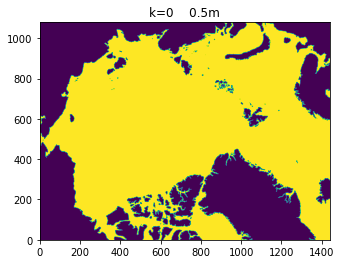

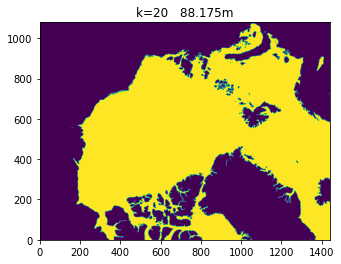

In [16]:
hFacC_N1_HH = su.combine_sassie_N1_faces_to_HH_3D(hFacC_N1_faces)
plt.figure();
plt.imshow(hFacC_N1_HH[0,:], origin='lower');plt.title('k=0    ' + str(Z_N1[0]) + 'm')
plt.figure();
plt.imshow(hFacC_N1_HH[20,:], origin='lower');plt.title('k=20   ' + str(Z_N1[20]) + 'm')

In [17]:
maskC_HH = np.where(hFacC_N1_HH > 0, 1, 0)

In [18]:
hFacC_HH_da = make_3D_HH_da(hFacC_N1_HH, 'hFacC')
hFacC_HH_da.attrs['description'] = 'fraction of grid height that is wet'

mask_HH_da = make_3D_HH_da(maskC_HH, 'maskC')
mask_HH_da.attrs['description'] = 'wet/dry mask   land = 0, wet = 1'

RAC_HH_da = make_2D_HH_da(RAC_HH, 'RAC')
RAC_HH_da.attrs['description'] = 'grid cell horizontal surface area'
RAC_HH_da.attrs['units'] = 'm2'

dX_HH_da = make_2D_HH_da(dX_HH, 'dX')
dX_HH_da.attrs['description'] = 'approximate grid cell horizontal side length'
dX_HH_da.attrs['units'] = 'm'

/home/ifenty/anaconda3/envs/ecco_38/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


In [19]:
drF_da = make_1D_HH_da(delR_N1,'drF')
drF_da.attrs['description'] = 'grid cell vertical thickness'
drF_da.attrs['units'] = 'm'


In [19]:
geometry_HH = xr.merge([hFacC_HH_da, mask_HH_da, RAC_HH_da, dX_HH_da, drF_da])

In [21]:
def add_time_metadata(G):
    # current time and date
    current_time = datetime.datetime.now().isoformat()[0:19]
    G.attrs['date_created'] = current_time
    G.attrs['date_modified'] = current_time
    G.attrs['date_metadata_modified'] = current_time
    G.attrs['date_issued'] = current_time

    return G

In [22]:
tmp_enc = create_encoding(geometry_HH)
geometry_HH = add_time_metadata(geometry_HH)


... creating coordinate encodings
